In [2]:
import requests
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np


#dfStargazers = pd.read_csv("../inputs/huggingface-transformers.csv")


In [11]:
df = pd.read_csv("../inputs/repos.csv").drop_duplicates(["full_name"])

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,is_template,web_commit_signoff_required,topics,visibility,forks,open_issues,watchers,default_branch,permissions,score
0,145553672,MDEwOlJlcG9zaXRvcnkxNDU1NTM2NzI=,funNLP,fighting41love/funNLP,False,[object Object],https://github.com/fighting41love/funNLP,中英文敏感词、语言检测、中外手机/电话归属地/运营商查询、名字推断性别、手机号抽取、身份证抽...,False,https://api.github.com/repos/fighting41love/fu...,...,False,False,NaN,public,12286,14,48096,master,[object Object],1
1,83844720,MDEwOlJlcG9zaXRvcnk4Mzg0NDcyMA==,face_recognition,ageitgey/face_recognition,False,[object Object],https://github.com/ageitgey/face_recognition,The world's simplest facial recognition api fo...,False,https://api.github.com/repos/ageitgey/face_rec...,...,False,False,"face-detection,face-recognition,machine-learni...",public,12813,710,47734,master,[object Object],1
2,343965132,MDEwOlJlcG9zaXRvcnkzNDM5NjUxMzI=,ML-For-Beginners,microsoft/ML-For-Beginners,False,[object Object],https://github.com/microsoft/ML-For-Beginners,"12 weeks, 26 lessons, 52 quizzes, classic Mach...",False,https://api.github.com/repos/microsoft/ML-For-...,...,False,False,NaN,public,9453,11,45458,main,[object Object],1
3,115478820,MDEwOlJlcG9zaXRvcnkxMTU0Nzg4MjA=,awesome-scalability,binhnguyennus/awesome-scalability,False,[object Object],https://github.com/binhnguyennus/awesome-scala...,"The Patterns of Scalable, Reliable, and Perfor...",False,https://api.github.com/repos/binhnguyennus/awe...,...,False,False,"architecture,awesome,awesome-list,backend,big-...",public,4979,16,44286,master,[object Object],1
4,114747226,MDEwOlJlcG9zaXRvcnkxMTQ3NDcyMjY=,faceswap,deepfakes/faceswap,False,[object Object],https://github.com/deepfakes/faceswap,Deepfakes Software For All,False,https://api.github.com/repos/deepfakes/faceswap,...,False,False,"deep-face-swap,deep-learning,deep-neural-netwo...",public,12193,19,44118,master,[object Object],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,111532439,MDEwOlJlcG9zaXRvcnkxMTE1MzI0Mzk=,deeplearning.ai,MenNianShi/deeplearning.ai,False,[object Object],https://github.com/MenNianShi/deeplearning.ai,"deeplearning.ai , By Andrew Ng, All slide and ...",False,https://api.github.com/repos/MenNianShi/deeple...,...,False,False,NaN,public,1053,0,8,master,[object Object],1
1429,37314213,MDEwOlJlcG9zaXRvcnkzNzMxNDIxMw==,docker-airflow-1,wmorin/docker-airflow-1,False,[object Object],https://github.com/wmorin/docker-airflow-1,Simple Airbnb Airflow container,False,https://api.github.com/repos/wmorin/docker-air...,...,False,False,NaN,public,2224,1,4,master,[object Object],1
1430,46080145,MDEwOlJlcG9zaXRvcnk0NjA4MDE0NQ==,ttt-with-ai-project-v-000,learn-co-students/ttt-with-ai-project-v-000,False,[object Object],https://github.com/learn-co-students/ttt-with-...,NaN,False,https://api.github.com/repos/learn-co-students...,...,False,False,NaN,public,1338,1199,2,master,[object Object],1
1432,577116112,R_kgDOImYX0A,awesome-chatgpt-prompts-zh,PlexPt/awesome-chatgpt-prompts-zh,False,[object Object],https://github.com/PlexPt/awesome-chatgpt-prom...,ChatGPT 中文调教指南。各种场景使用指南。学习怎么让它听你的话。,False,https://api.github.com/repos/PlexPt/awesome-ch...,...,False,False,"chat-gpt,chatgpt,chatgpt3",public,6903,18,22647,main,[object Object],1


In [3]:
dfStargazers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   login                40000 non-null  object 
 1   id                   40000 non-null  int64  
 2   node_id              40000 non-null  object 
 3   avatar_url           40000 non-null  object 
 4   gravatar_id          0 non-null      float64
 5   url                  40000 non-null  object 
 6   html_url             40000 non-null  object 
 7   followers_url        40000 non-null  object 
 8   following_url        40000 non-null  object 
 9   gists_url            40000 non-null  object 
 10  starred_url          40000 non-null  object 
 11  subscriptions_url    40000 non-null  object 
 12  organizations_url    40000 non-null  object 
 13  repos_url            40000 non-null  object 
 14  events_url           40000 non-null  object 
 15  received_events_url  40000 non-null 

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


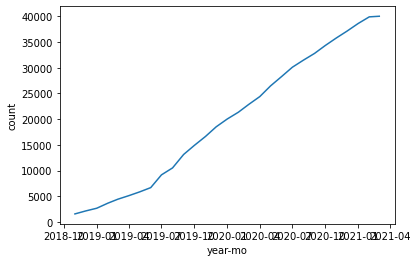

In [20]:
dfStargazers['starred_at'] = pd.to_datetime(dfStargazers['starred_at'])
dfStargazers["year-mo"] = dfStargazers["starred_at"].dt.to_period('M')
data = dfStargazers.groupby("year-mo")["id"].count().reset_index()
data["year-mo"] = data["year-mo"].dt.to_timestamp()
data["count"] = data.id.cumsum()
sns.lineplot(data=data, x="year-mo", y="count")
plt.show()

In [26]:
dfForks = pd.read_csv("../inputs/huggingface-transformers-forks.csv")
dfForks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17632 non-null  int64  
 1   node_id                      17632 non-null  object 
 2   name                         17632 non-null  object 
 3   full_name                    17632 non-null  object 
 4   private                      17632 non-null  bool   
 5   owner                        17632 non-null  object 
 6   html_url                     17632 non-null  object 
 7   description                  17629 non-null  object 
 8   fork                         17632 non-null  bool   
 9   url                          17632 non-null  object 
 10  forks_url                    17632 non-null  object 
 11  keys_url                     17632 non-null  object 
 12  collaborators_url            17632 non-null  object 
 13  teams_url       

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


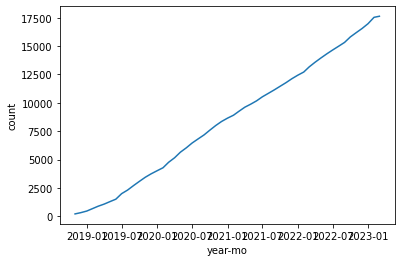

In [27]:
dfForks['created_at'] = pd.to_datetime(dfForks['created_at'])
dfForks["year-mo"] = dfForks["created_at"].dt.to_period('M')
data = dfForks.groupby("year-mo")["id"].count().reset_index()
data["year-mo"] = data["year-mo"].dt.to_timestamp()
data["count"] = data.id.cumsum()
sns.lineplot(data=data, x="year-mo", y="count")
plt.show()

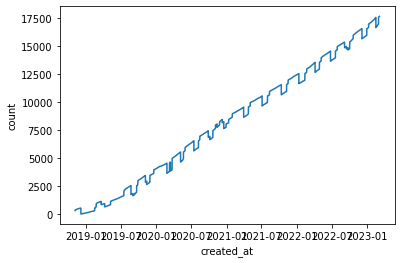

In [38]:
dfForks['created_at'] = pd.to_datetime(dfForks['created_at'])
dfForks["count"] = len(dfForks) - np.array(dfForks.index)
sns.lineplot(data=dfForks, x="created_at", y="count")
plt.show()

In [37]:
len(df)-len(df.drop_duplicates())

2039